In [656]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import plotly.express as px
from datasist.structdata import detect_outliers

In [657]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

In [658]:
df=pd.read_csv(r"C:\Users\NOUR SOFT\Downloads\used_cars_data.csv")

In [659]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [661]:
df.duplicated().sum()

0

In [662]:
df.describe()

S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000

In [663]:
df.describe(include="O")

Name Location Fuel_Type Transmission Owner_Type  \
count                     7253     7253      7253         7253       7253   
unique                    2041       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        55      949      3852         5204       5952   

          Mileage   Engine   Power   New_Price  
count        7251     7207    7207        1006  
unique        450      150     386         625  
top     17.0 kmpl  1197 CC  74 bhp  63.71 Lakh  
freq          207      732     280           6

In [664]:
def convert_mileage(value):
    if pd.isna(value):  
        return value
    if 'km/kg' in value:
        km_per_kg = float(value.split()[0])
        km_per_l = km_per_kg * 1.5  
        return f"{km_per_l:.2f} kmpl"
    elif 'kmpl' in value:
        return value
    return value

df['Mileage'] = df['Mileage'].apply(convert_mileage)


In [665]:
#df["Engine"].unique().tolist()

In [666]:
#df["Power"].unique().tolist()

In [667]:
def remove_kmpl(value):
    if pd.isna(value):  
        return value
    if isinstance(value, str) and 'kmpl' in value:  
        return float(value.split()[0])
    return value  

df['Mileage'] = df['Mileage'].apply(remove_kmpl)

In [668]:
def remove_cc(value):
    if pd.isna(value):
        return value
    if isinstance(value, str) and 'CC' in value:
        return float(value.split()[0])
    return value

df['Engine'] = df['Engine'].apply(remove_cc)

In [669]:
def remove_bhp(value):
    if pd.isna(value):  
        return value
    try:
        if 'bhp' in value:
            return float(value.split()[0])  
    except (ValueError, AttributeError):
        pass  
    return np.nan  

df['Power'] = df['Power'].apply(remove_bhp)


In [670]:
df.columns = df.columns.str.replace('Mileage', 'Mileage_kmpl')
df.columns = df.columns.str.replace('Engine', 'Engine_CC')
df.columns = df.columns.str.replace('Power', 'Power_bhp')

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage_kmpl       7251 non-null   float64
 9   Engine_CC          7207 non-null   float64
 10  Power_bhp          7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [672]:
df.describe()

S.No.         Year  Kilometers_Driven  Mileage_kmpl    Engine_CC  \
count  7253.000000  7253.000000       7.253000e+03   7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04     18.265835  1616.573470   
std    2093.905084     3.254421       8.442772e+04      4.939526   595.285137   
min       0.000000  1996.000000       1.710000e+02      0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04     15.260000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04     18.200000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04     21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06     50.310000  5998.000000   

         Power_bhp        Seats        Price  
count  7078.000000  7200.000000  6019.000000  
mean    112.765214     5.279722     9.479468  
std      53.493553     0.811660    11.187917  
min      34.200000     0.000000     0.440000  
25%      75.000000     5.000000     3.500000  
50%      94.000000     5.000000     5.640000  
75%     138.100000     5.000000     9.950000  
max     616.000000    10.000000   160.000000

In [673]:
df.isna().mean()*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage_kmpl          0.027575
Engine_CC             0.634220
Power_bhp             2.412795
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [674]:
df.drop(["New_Price","S.No."],axis=1,inplace=True)

In [675]:
df[df["Seats"].isna()]

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369                             Maruti Estilo LXI     Chennai  2008   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882                             Maruti Estilo LXI     Kolkata  2010   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   
5893                             Maruti Estilo LXI     Chennai  2008   
6042                  Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
6541         Toyota Etios Liva Diesel TRD Sportivo   Bangalore  2012   
6544                 Hyundai i20 new Sportz AT 1.4   Bangalore  2012   
6633                           Mahindra TUV 300 P4     Kolkata  2016   
6643                       BMW 5 Series 520d Sedan   Bangalore  2009   
6651                          Maruti Swift 1.3 VXi     Kolkata  2015   
6677                        Fiat Punto 1.4 Emotion      Jaipur  2010   
6685                          Maruti Swift 1.3 VXi        Pune  2010   
6880                       BMW 5 Series 520d Sedan     Chennai  2009   
6902                           Toyota Etios Liva V       Kochi  2012   
6957                        Honda Jazz 2020 Petrol       Kochi  2019   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage_kmpl  \
194               60006    Petrol       Manual           First          0.00 

In [676]:
df["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                                         55
Maruti Swift VDI                                               49
Maruti Swift Dzire VDI                                         42
Honda City 1.5 S MT                                            39
Maruti Swift VDI BSIV                                          37
Maruti Ritz VDi                                                35
Toyota Fortuner 3.0 Diesel                                     35
Honda Amaze S i-Dtech                                          32
Hyundai Grand i10 Sportz                                       32
Honda City 1.5 V MT                                            32
Honda Brio S MT                                                32
Hyundai i10 Sportz                                             31
Maruti Alto LXi                                                30
Maruti Wagon R LXI                                             29
Maruti Ertiga VDI                                              28
Volks

In [677]:
def extract_type_and_model(car_name):
    parts = car_name.split(' ')  
    car_type = parts[0]  
    car_model = parts[1]
    return pd.Series([car_type, car_model])

In [678]:
df[['Type of Car', 'Car Model']] = df['Name'].apply(extract_type_and_model)

In [679]:
df['Seats'] = df.groupby(['Type of Car', 'Car Model'])['Seats'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 5))

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_kmpl       7251 non-null   float64
 8   Engine_CC          7207 non-null   float64
 9   Power_bhp          7078 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              6019 non-null   float64
 12  Type of Car        7253 non-null   object 
 13  Car Model          7253 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 793.4+ KB


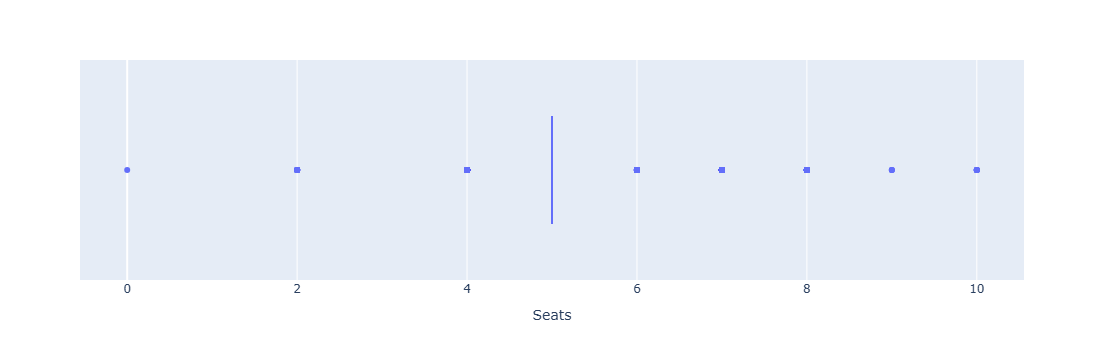

In [681]:
px.box(data_frame=df,x="Seats")

In [682]:
df[df["Seats"]==0]

Name   Location  Year  Kilometers_Driven  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012             125000   

     Fuel_Type Transmission Owner_Type  Mileage_kmpl  Engine_CC  Power_bhp  \
3999    Petrol    Automatic      First          10.5     3197.0        NaN   

      Seats  Price Type of Car Car Model  
3999    0.0   18.0        Audi        A4

In [683]:
df["Seats"]=df["Seats"].replace(0,4)#by search

In [684]:
df[df["Seats"]>5]

Name    Location  \
3                                               Maruti Ertiga VDI     Chennai   
7                               Toyota Innova Crysta 2.8 GX AT 8S      Mumbai   
15                                    Mitsubishi Pajero Sport 4X4       Delhi   
29                            Toyota Innova 2.5 V Diesel 7-seater      Mumbai   
32                                  Mahindra Ssangyong Rexton RX7   Bangalore   
42                      Mahindra KUV 100 mFALCON D75 K8 Dual Tone  Coimbatore   
47                                 Toyota Innova Crysta 2.7 GX MT   Bangalore   
49                                          Mahindra Thar CRDe AC      Jaipur   
60                              Toyota Innova Crysta 2.4 GX MT 8S      Mumbai   
68                                         Maruti Ertiga SHVS VDI        Pune   
71                                         Mahindra XUV500 W8 4WD      Mumbai   
77                                           Toyota Innova 2.0 G1     Chennai   
78                                Toyota Innova 2.5 VX 7 STR BSIV   Hyderabad   
91                                     Toyota Fortuner 4x2 Manual       Delhi   
94                                         Mahindra XUV500 W8 2WD       Delhi   
102                                       Datsun GO Plus T Petrol        Pune   
108                                        Mahindra XUV500 W8 2WD       Delhi   
110                                Toyota Innova Crysta 2.8 ZX AT      Mumbai   
115                        Toyota Innova 2.5 VX (Diesel) 7 Seater   Ahmedabad   
125                                          Mahindra Scorpio VLX     Kolkata   
131                                    Mahindra XUV500 AT W10 FWD      Jaipur   
144                                    Toyota Fortuner 3.0 Diesel  Coimbatore   
161                         Toyota Innova 2.5 G (Diesel) 7 Seater   Ahmedabad   
163                                        Mahindra XUV500 W8 2WD      Mumbai   
165                                    Toyota Fortuner 4x2 Manual      Mumbai   
185                              Renault Lodgy 110PS RxZ 8 Seater      Mumbai   
190                                 Mahindra Scorpio 1.99 S10 4WD       Kochi   
193                                             Maruti Ertiga ZDI      Mumbai   
200                                         Mahindra NuvoSport N6     Chennai   
235                                Toyota Innova Crysta 2.8 GX AT       Kochi   
236                                       Hyundai Santa Fe 4x4 AT      Mumbai   
242                           Toyota Innova 2.5 Z Diesel 7 Seater  Coimbatore   
243                                             Maruti Ertiga VDI     Chennai   
244                           Toyota Innova 2.5 V Diesel 7-seater      Mumbai   
256                                Toyota Innova Crysta 2.4 ZX MT        Pune   
273                          Toyota Innova 2.5 G4 Diesel 7-seater        Pune   
276                    Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV        Pune   
282                            Audi Q7 3.0 TDI Quattro Technology       Kochi   
298                                Toyota Innova Crysta 2.4 ZX MT     Chennai   
300                        Toyota Innova 2.5 VX (Diesel) 7 Seater   Hyderabad   
315                                               Tata Sumo Delux   Hyderabad   
318                                        Mahindra XUV500 W8 4WD   Hyderabad   
320                                       Maruti Ertiga Paseo VXI      Mumbai   
327                             Audi Q7 45 TDI Quattro Technology  Coimbatore   
373                          Audi Q7 3.0 TDI Quattro Premium Plus      Mumbai   
380                                        Honda BRV i-VTEC V CVT       Kochi   
400               Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury        Pune   
401              Mitsubishi Pajero Sport 4X2 AT DualTone BlackTop   Hyderabad   
412                                      Mahindra Scorpio S10 4WD       Kochi   
414        

In [685]:
df[df["Seats"]==10]["Name"]#search true

814                       Toyota Qualis FS B2
917                              Tata Sumo DX
1907                      Toyota Qualis FS B3
2267                      Toyota Qualis RS E2
2575    Chevrolet Tavera LS B3 10 Seats BSIII
6242               Tata Sumo EX 10/7 Str BSII
6288    Chevrolet Tavera LS B3 10 Seats BSIII
6875                      Toyota Qualis FS B3
Name: Name, dtype: object

In [686]:
df["Seats"]=df["Seats"].astype("int")

In [687]:
numeric_cols = df.select_dtypes(include=['number']).columns
knn_imp = KNNImputer(n_neighbors=3)
df[numeric_cols] = knn_imp.fit_transform(df[numeric_cols])

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   float64
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_kmpl       7253 non-null   float64
 8   Engine_CC          7253 non-null   float64
 9   Power_bhp          7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              7253 non-null   float64
 12  Type of Car        7253 non-null   object 
 13  Car Model          7253 non-null   object 
dtypes: float64(7), object(7)
memory usage: 793.4+ KB


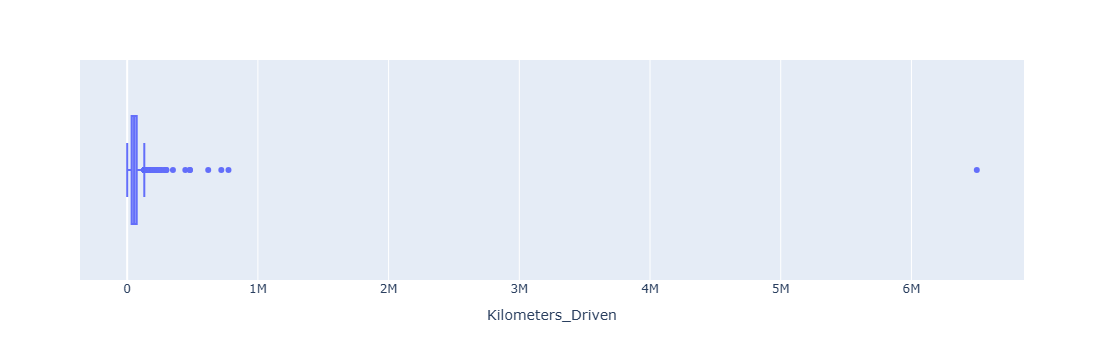

In [689]:
px.box(data_frame=df,x="Kilometers_Driven")

In [690]:
Q1 = df["Kilometers_Driven"].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
df_outliers = df[(df["Kilometers_Driven"] < min) | (df["Kilometers_Driven"] > max)]
df_outliers

Name    Location  \
29                       Toyota Innova 2.5 V Diesel 7-seater      Mumbai   
64                                        Tata Indica V2 eLS     Chennai   
77                                      Toyota Innova 2.0 G1     Chennai   
154                      Skoda Superb Elegance 2.0 TDI CR AT        Pune   
164                        Ford Ecosport 1.5 DV5 MT Ambiente       Kochi   
165                               Toyota Fortuner 4x2 Manual      Mumbai   
181                 Ford Fiesta 1.4 TDCi EXI Limited Edition     Chennai   
230                                  Tata Indica V2 DLS BSII      Jaipur   
251                                      Hyundai Accent CRDi       Kochi   
261                                Hyundai Verna CRDi 1.6 SX   Hyderabad   
315                                          Tata Sumo Delux   Hyderabad   
319                                     Tata Indigo LS Dicor        Pune   
323                             Ford Fiesta EXi 1.4 TDCi Ltd   Hyderabad   
340                   Skoda Octavia Ambition Plus 2.0 TDI AT     Kolkata   
345                     Tata Indica Vista Aqua 1.3 Quadrajet   Hyderabad   
358                                    Hyundai i10 Magna 1.2     Chennai   
432                       Skoda Laura Ambiente 2.0 TDI CR AT  Coimbatore   
469                   Toyota Innova 2.5 VX (Diesel) 7 Seater   Hyderabad   
482                 Ford Endeavour Hurricane Limited Edition   Hyderabad   
506                Mercedes-Benz S Class 2005 2013 S 350 CDI        Pune   
556                                     Toyota Etios Liva GD     Chennai   
576                   Audi A6 2011-2015 2.0 TDI Premium Plus   Hyderabad   
624                                        BMW 3 Series 320d     Chennai   
647                                   Hyundai Santro Xing XP      Jaipur   
664                                    Hyundai Verna CRDi SX      Jaipur   
685                                          Maruti Ritz VDi   Hyderabad   
792                              Ford Endeavour XLT TDCi 4X2      Jaipur   
800                                   Toyota Fortuner 4x4 MT   Hyderabad   
838                                         Mahindra Xylo H4     Chennai   
920                                Tata Indigo eCS eLX BS IV       Delhi   
946                              Mitsubishi Pajero Sport 4X4   Bangalore   
981                                Maruti Baleno Vxi - BSIII        Pune   
994                                 Maruti Wagon R VXI Minor     Chennai   
1013                                 Mahindra Scorpio 2.6 LX   Bangalore   
1022                                     Honda City 1.5 V MT        Pune   
1068                                    Toyota Etios Liva GD        Pune   
1101                     Toyota Innova 2.5 V Diesel 7-seater     Chennai   
1176                        Fiat Linea Emotion Pack (Diesel)        Pune   
1232                             Hyundai Xcent 1.1 CRDi Base      Mumbai   
1248                       Maruti Ertiga VDI Limited Edition     Chennai   
1297                             Fiat Linea Emotion (Diesel)     Kolkata   
1409                             Maruti Swift Dzire Tour LDI     Kolkata   
1442                                     Honda City 1.5 S MT       Delhi   
1447                                Ford Fiesta Diesel Style     Chennai   
1470                                    Maruti 800 Std BSIII      Jaipur   
1473                          Toyota Fortuner 4x2 4 Speed AT   Hyderabad   
1521                   Toyota Innova 2.5 G (Diesel) 8 Seater     Chennai   
1528             Toyota Innova 2.5 G (Diesel) 8 Seater BS IV   Hyderabad   
1539                         Tata Manza ELAN Quadrajet BS IV        Pune   
1555                               Chevrolet Optra 1.6 Elite        Pune   
1584                              Toyota Fortuner 3.0 Diesel     Chennai   
1597                                  Maruti Swift Vdi BSIII        Pune   
1656                        

In [691]:
df[df["Kilometers_Driven"]>=400000]

Name   Location    Year  \
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013.0   
358                             Hyundai i10 Magna 1.2    Chennai  2009.0   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013.0   
2328                        BMW X5 xDrive 30d M Sport    Chennai  2017.0   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015.0   
3092                             Honda City i VTEC SV    Kolkata  2015.0   
4491                   Hyundai i20 Magna Optional 1.2  Bangalore  2013.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_kmpl  \
340            775000.0    Diesel    Automatic      First         19.30   
358            620000.0    Petrol       Manual      First         20.36   
1860           720000.0    Diesel       Manual      First         20.54   
2328          6500000.0    Diesel    Automatic      First         15.97   
2823           480000.0    Diesel    Automatic      First         16.96   
3092           480000.0    Petrol       Manual      First         17.40   
4491           445000.0    Petrol       Manual      First         18.50   

      Engine_CC  Power_bhp  Seats  Price Type of Car Car Model  
340      1968.0     141.00    5.0   7.50       Skoda   Octavia  
358      1197.0      78.90    5.0   2.70     Hyundai       i10  
1860     1598.0     103.60    5.0   5.90  Volkswagen     Vento  
2328     2993.0     258.00    5.0  65.00         BMW        X5  
2823     1968.0     138.03    5.0  13.00  Volkswagen     Jetta  
3092     1497.0     117.30    5.0   5.00       Honda      City  
4491     1197.0      82.90    5.0   4.45     Hyundai       i20

In [692]:
df.loc[[340, 358, 1860, 2328], "Kilometers_Driven"] = np.nan

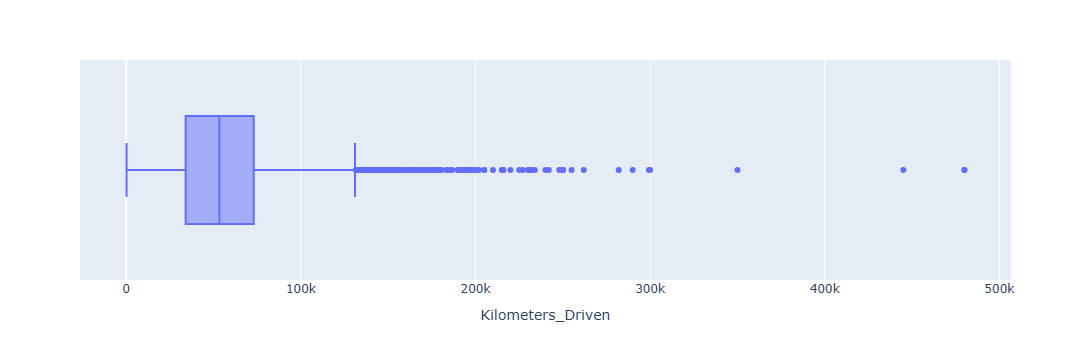

In [693]:
px.box(data_frame=df ,x="Kilometers_Driven")


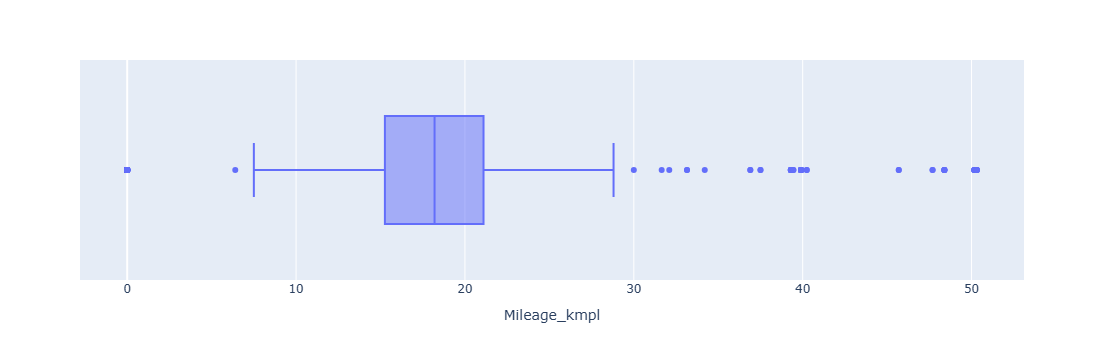

In [694]:
px.box(data_frame=df ,x="Mileage_kmpl")

In [695]:
df[df["Mileage_kmpl"] >=28.8]

Name   Location    Year  \
0                   Maruti Wagon R LXI CNG     Mumbai  2010.0   
5          Hyundai EON LPG Era Plus Option  Hyderabad  2012.0   
127                 Maruti Wagon R LXI CNG       Pune  2013.0   
328      Maruti Zen Estilo LXI Green (CNG)       Pune  2008.0   
839            Maruti Alto Green LXi (CNG)      Delhi  2012.0   
936            Maruti Wagon R LXI LPG BSIV  Hyderabad  2012.0   
1135     Maruti Zen Estilo LXI Green (CNG)  Ahmedabad  2011.0   
1218                Maruti Wagon R LXI CNG       Pune  2015.0   
1269     Maruti Alto 800 2016-2019 CNG LXI     Mumbai  2018.0   
1332                Maruti Wagon R CNG LXI       Pune  2013.0   
1357                Maruti Wagon R LXI CNG     Mumbai  2014.0   
1780                Maruti Wagon R LXI CNG     Mumbai  2013.0   
1911                Maruti Wagon R LXI CNG  Ahmedabad  2016.0   
1914  Hyundai Xcent 1.2 Kappa S Option CNG    Chennai  2017.0   
2059                Maruti Wagon R CNG LXI     Mumbai  2013.0   
2110           Tata Indigo CS Emax CNG GLX       Pune  2014.0   
2323  Hyundai Xcent 1.2 Kappa S Option CNG      Delhi  2016.0   
2371                Maruti Wagon R CNG LXI       Pune  2014.0   
2376                Maruti Wagon R LXI CNG  Hyderabad  2013.0   
2436                 Hyundai i10 Magna LPG     Jaipur  2012.0   
2437           Tata Indigo CS Emax CNG GLX    Chennai  2015.0   
2516            Maruti SX4 Green Vxi (CNG)     Mumbai  2014.0   
2638                Maruti Wagon R LXI CNG       Pune  2012.0   
2701             Maruti Celerio CNG VXI MT      Kochi  2016.0   
3008                Maruti Wagon R LXI CNG      Delhi  2014.0   
3031                 Maruti Ertiga VXI CNG     Mumbai  2013.0   
3097                Maruti Wagon R LXI CNG       Pune  2012.0   
3119      Maruti Alto K10 LXI CNG Optional      Kochi  2018.0   
3129                Maruti Wagon R CNG LXI      Delhi  2014.0   
3180           Maruti Eeco CNG 5 Seater AC  Ahmedabad  2015.0   
3295                Maruti Wagon R LXI CNG      Delhi  2013.0   
3455                Maruti Wagon R LXI CNG     Mumbai  2014.0   
3511           Maruti Alto Green LXi (CNG)  Hyderabad  2012.0   
3553     Maruti Alto 800 2016-2019 CNG LXI       Pune  2015.0   
3722            Maruti SX4 Green Vxi (CNG)      Kochi  2015.0   
3869     Maruti Alto 800 2016-2019 CNG LXI      Delhi  2012.0   
4098            Maruti SX4 Green Vxi (CNG)      Delhi  2012.0   
4141                Maruti Wagon R CNG LXI     Mumbai  2014.0   
4411                Maruti Wagon R LXI CNG      Kochi  2014.0   
4769     Maruti Alto 800 2016-2019 CNG LXI      Kochi  2017.0   
4920                Maruti Wagon R LXI CNG       Pune  2014.0   
5178             Maruti Celerio CNG VXI MT      Delhi  2015.0   
5506           Maruti Wagon R Duo LX BSIII  Hyderabad  2012.0   
5655                Maruti Wagon R LXI CNG     Mumbai  2015.0   
5710               Maruti Alto 800 CNG LXI     Mumbai  2013.0   
5747                Maruti Wagon R LXI CNG      Delhi  2014.0   
5881                Maruti Wagon R LXI CNG       Pune  2015.0   
5902                Maruti Wagon R LXI CNG     Mumbai  2012.0   
5935               Maruti Alto K10 LXI CNG       Pune  2015.0   
5997                Maruti Wagon R Duo Lxi     Jaipur  2010.0   
6019               Maruti Alto K10 LXI CNG      Delhi  2014.0   
6538               Maruti Alto K10 LXI CNG      Kochi  2015.0   
6788      Maruti Alto K10 LXI CNG Optional      Delhi  2017.0   
6958               Maruti Alto 800 CNG LXI    Kolkata  2013.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_kmpl  \
0               72000.0       CNG       Manual      First         39.90   
5               75000.0       LPG       Manual      First         31.65   
127             89900.0       CNG       Manual      First         39.90   
328             42496.0       CNG       Manual      First         39.45   
839             65537.0       CNG       Manual      First         40.24   
936         

In [696]:
df[df["Mileage_kmpl"] == 0]

Name    Location    Year  \
14                  Land Rover Freelander 2 TD4 SE        Pune  2012.0   
67        Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019.0   
79                          Hyundai Santro Xing XL   Hyderabad  2005.0   
194                             Honda City 1.5 GXI   Ahmedabad  2007.0   
229                               Ford Figo Diesel   Bangalore  2015.0   
262                         Hyundai Santro Xing XL   Hyderabad  2006.0   
307                         Hyundai Santro Xing XL     Chennai  2006.0   
424           Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010.0   
443                  Hyundai Santro GLS I - Euro I  Coimbatore  2012.0   
544    Mercedes-Benz New C-Class Progressive C 200       Kochi  2019.0   
631                      Hyundai Santro LS zipPlus     Chennai  2002.0   
647                         Hyundai Santro Xing XP      Jaipur  2004.0   
707            Mercedes-Benz M-Class ML 350 4Matic        Pune  2014.0   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008.0   
915                            Smart Fortwo CDI AT        Pune  2008.0   
962       Mercedes-Benz C-Class Progressive C 220d      Mumbai  2018.0   
996                         Hyundai Santro Xing GL        Pune  2008.0   
1059                        Hyundai Santro Xing GL   Hyderabad  2010.0   
1259                 Land Rover Freelander 2 TD4 S   Bangalore  2010.0   
1271                Hyundai Santro GLS I - Euro II      Jaipur  2009.0   
1308           Mercedes-Benz M-Class ML 350 4Matic   Bangalore  2014.0   
1345                             Maruti Baleno Vxi        Pune  2005.0   
1354                        Hyundai Santro Xing GL       Kochi  2011.0   
1385                            Honda City 1.5 GXI        Pune  2004.0   
1419                        Hyundai Santro Xing XL     Chennai  2007.0   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008.0   
1764           Mercedes-Benz M-Class ML 350 4Matic        Pune  2015.0   
1857                             Hyundai Santro DX   Hyderabad  2007.0   
2053                       Mahindra Jeep MM 550 PE   Hyderabad  2009.0   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004.0   
2130                Hyundai Santro GLS I - Euro II  Coimbatore  2012.0   
2267                           Toyota Qualis RS E2        Pune  2004.0   
2343                             Hyundai Santro AT   Hyderabad  2006.0   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011.0   
2597                        Hyundai Santro Xing XP        Pune  2007.0   
2681                       Skoda Superb 3.6 V6 FSI   Hyderabad  2010.0   
2780               Hyundai Santro GLS II - Euro II        Pune  2009.0   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012.0   
3033                        Hyundai Santro Xing XP      Jaipur  2005.0   
3044                        Hyundai Santro Xing GL     Kolkata  2009.0   
3061                             Hyundai Santro GS   Ahmedabad  2005.0   
3093                   Audi A7 2011-2015 Sportback     Kolkata  2012.0   
3189          Hyundai Santro GS zipDrive - Euro II     Chennai  2002.0   
3210           Mercedes-Benz M-Class ML 350 4Matic  Coimbatore  2016.0   
3271                        Hyundai Santro Xing GL   Bangalore  2008.0   
3516                 Hyundai Santro GLS I - Euro I        Pune  2011.0   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012.0   
3645                        Hyundai Santro Xing XP   Bangalore  2004.0   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003.0   
4234           Mercedes-Benz M-Class ML 350 4Matic     Chennai  2012.0   
4302                        Hyundai Santro Xing GL       Delhi  2012.0   
4412           Mercedes-Benz M-Class ML 350 4Matic  Coimbatore  2016.0   
4629                            Fiat Siena 1.2 ELX      Jaipur  2001.0   
4687                Land Rover Freelander 2 TD4 SE

In [697]:
df[df["Mileage_kmpl"] ==6.4 ] #True

Name Location    Year  Kilometers_Driven  \
5781  Lamborghini Gallardo Coupe    Delhi  2011.0             6500.0   

     Fuel_Type Transmission Owner_Type  Mileage_kmpl  Engine_CC  Power_bhp  \
5781    Petrol    Automatic      Third           6.4     5204.0      560.0   

      Seats  Price  Type of Car Car Model  
5781    2.0  120.0  Lamborghini  Gallardo

In [698]:
#df[(df["Mileage_kmpl"] >= 40) | (df["Mileage_kmpl"] == 0)].index.tolist()

In [699]:
df.loc[[14,
 67,
 79,
 194,
 229,
 262,
 307,
 424,
 443,
 544,
 631,
 647,
 707,
 749,
 839,
 915,
 962,
 996,
 1059,
 1259,
 1269,
 1271,
 1308,
 1332,
 1345,
 1354,
 1385,
 1419,
 1460,
 1764,
 1857,
 2053,
 2059,
 2096,
 2130,
 2267,
 2343,
 2371,
 2542,
 2597,
 2681,
 2701,
 2780,
 2842,
 3033,
 3044,
 3061,
 3093,
 3119,
 3129,
 3189,
 3210,
 3271,
 3511,
 3516,
 3522,
 3553,
 3645,
 3869,
 4141,
 4152,
 4234,
 4302,
 4412,
 4629,
 4687,
 4704,
 4769,
 5016,
 5022,
 5119,
 5178,
 5270,
 5311,
 5374,
 5426,
 5529,
 5647,
 5710,
 5875,
 5935,
 5943,
 5972,
 6011,
 6019,
 6090,
 6093,
 6177,
 6205,
 6439,
 6454,
 6491,
 6538,
 6576,
 6633,
 6697,
 6788,
 6857,
 6957,
 6958,
 7226],"Mileage_kmpl"]=np.nan

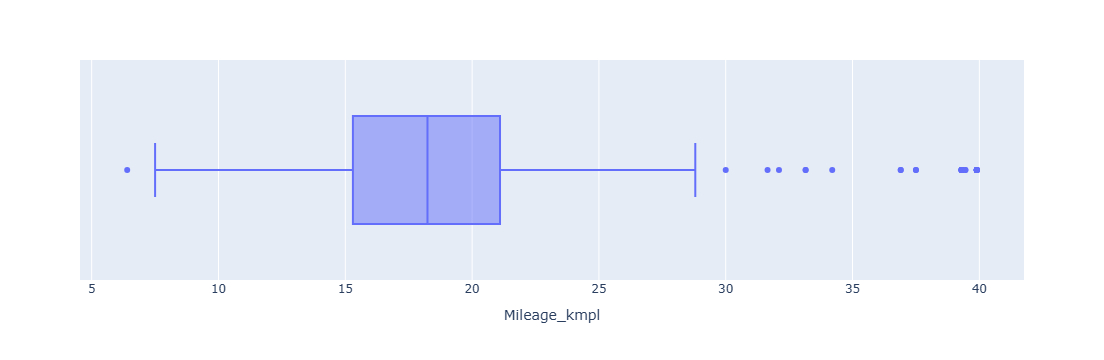

In [700]:
px.box(data_frame=df ,x="Mileage_kmpl")

In [701]:
df.isna().mean()*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.055150
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage_kmpl         1.392527
Engine_CC            0.000000
Power_bhp            0.000000
Seats                0.000000
Price                0.000000
Type of Car          0.000000
Car Model            0.000000
dtype: float64

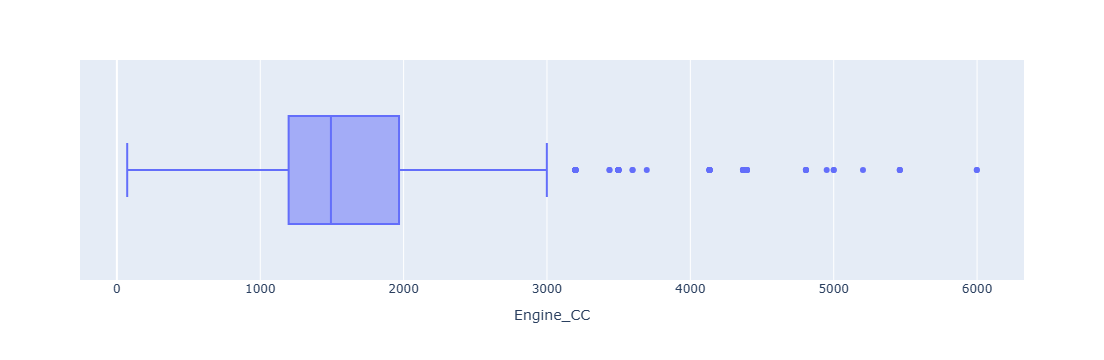

In [702]:
px.box(data_frame=df ,x="Engine_CC")

In [703]:
df[df["Engine_CC"]>2999]# real it is super car 

Name    Location    Year  \
70                    Porsche Cayenne 2009-2014 Turbo      Mumbai  2008.0   
152             Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010.0   
459                Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2016.0   
586                Audi Q7 4.2 TDI Quattro Technology       Kochi  2014.0   
589           Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore  2006.0   
693                   Mercedes-Benz SLK-Class SLK 350  Coimbatore  2016.0   
703                   Ford Endeavour 3.2 Trend AT 4X4  Coimbatore  2017.0   
798                   Mercedes-Benz SLK-Class SLK 350   Bangalore  2015.0   
806                Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017.0   
926                        Porsche Cayman 2009-2012 S   Hyderabad  2010.0   
1038             Land Rover Range Rover TDV8 (Diesel)   Bangalore  2011.0   
1076               Ford Endeavour 3.2 Titanium AT 4X4   Hyderabad  2016.0   
1093               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2014.0   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel   Bangalore  2012.0   
1430                  Ford Endeavour 3.2 Trend AT 4X4       Kochi  2018.0   
1596                          Audi Q7 4.2 FSI quattro       Delhi  2008.0   
1724               Ford Endeavour 3.2 Titanium AT 4X4       Delhi  2017.0   
1930          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2007.0   
2100                          Porsche Cayenne Turbo S      Mumbai  2010.0   
2305             Porsche Cayman 2009-2012 S tiptronic      Mumbai  2011.0   
2588                       Mitsubishi Montero 3.2 GLS     Chennai  2007.0   
2669                  Ford Endeavour 3.2 Trend AT 4X4  Coimbatore  2018.0   
2681                          Skoda Superb 3.6 V6 FSI   Hyderabad  2010.0   
2978                    Porsche Panamera 2010 2013 4S  Coimbatore  2010.0   
3028               Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017.0   
3065      Mercedes-Benz E-Class 2009-2013 E350 Petrol      Mumbai  2010.0   
3079               Ford Endeavour 3.2 Titanium AT 4X4      Mumbai  2016.0   
3115                  Ford Endeavour 3.2 Trend AT 4X4      Jaipur  2016.0   
3196               Ford Endeavour 3.2 Titanium AT 4X4     Chennai  2019.0   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8   Bangalore  2012.0   
3341                     BMW 7 Series 2007-2012 750Li       Kochi  2010.0   
3580        Mercedes-Benz CLS-Class 2006-2010 350 CDI   Hyderabad  2010.0   
3999                Audi A4 3.2 FSI Tiptronic Quattro   Hyderabad  2012.0   
4039           Mercedes-Benz R-Class R350 4Matic Long      Mumbai  2011.0   
4136      Mercedes-Benz E-Class 2009-2013 E350 Petrol      Mumbai  2009.0   
4227                  Ford Endeavour 3.2 Trend AT 4X4     Chennai  2016.0   
4342          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2006.0   
4388               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2015.0   
4451                                  Ford Mustang V8       Kochi  2018.0   
4559               Audi Q7 4.2 TDI Quattro Technology       Delhi  2010.0   
4627                          BMW 6 Series 650i Coupe       Kochi  2010.0   
4691                   Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014.0   
4722                    Mercedes-Benz SL-Class SL 500     Kolkata  2010.0   
4821                          BMW 6 Series 630i Coupe      Mumbai  2011.0   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore  2012.0   
4906               Ford Endeavour 3.2 Titanium AT 4X4   Hyderabad  2018.0   
4938               Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2015.0   
5088                  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011.0   
5278               Ford Endeavour 3.2 Titanium AT 4X4       Delhi  2018.0   
5323               Ford Endeavour 3.2 Titanium AT 4X4     Chennai  2017.0   
5341                         Porsche Cayenne S Diesel  Coimbatore  2016.0   
5414           Mercedes-Benz R-Class R350 4Ma

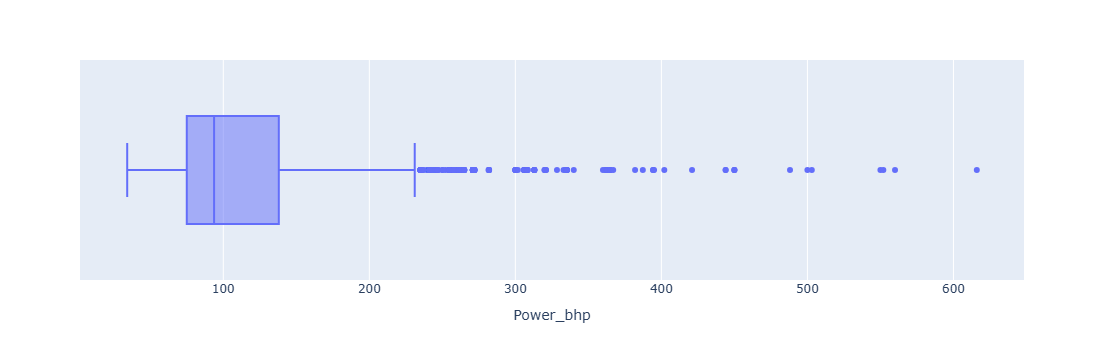

In [704]:
px.box(data_frame=df ,x="Power_bhp")

In [705]:
df[df["Power_bhp"]>231.1]

Name    Location  \
38                               Mercedes-Benz M-Class ML 350 CDI        Pune   
70                                Porsche Cayenne 2009-2014 Turbo      Mumbai   
103                               Audi A4 3.0 TDI Quattro Premium     Kolkata   
107                          Jaguar XF 3.0 Litre S Premium Luxury   Hyderabad   
134                                      Mercedes-Benz SLC 43 AMG     Kolkata   
148                                                Audi RS5 Coupe      Mumbai   
152                         Mercedes-Benz S Class 2005 2013 S 500     Kolkata   
168                                             BMW X5 xDrive 30d      Mumbai   
216                                     Audi A8 L 3.0 TDI quattro       Delhi   
264                                        Mercedes-Benz GLE 350d  Coimbatore   
271                                      BMW X3 xDrive30d M Sport  Coimbatore   
282                            Audi Q7 3.0 TDI Quattro Technology       Kochi   
326                                  BMW 6 Series 640d Gran Coupe      Mumbai   
327                             Audi Q7 45 TDI Quattro Technology  Coimbatore   
369                                                   BMW X5 3.0d   Bangalore   
373                          Audi Q7 3.0 TDI Quattro Premium Plus      Mumbai   
389                                           Jaguar XE Portfolio      Mumbai   
392                     Mercedes-Benz S Class 2005 2013 S 350 CDI  Coimbatore   
407                                              Jaguar XF Diesel   Bangalore   
418                                Mercedes-Benz GLC 43 AMG Coupe  Coimbatore   
435                             BMW 5 Series 2003-2012 GT 530d LE  Coimbatore   
459                            Audi Q7 4.2 TDI Quattro Technology  Coimbatore   
489                                 Mercedes-Benz GLS 350d 4MATIC        Pune   
506                     Mercedes-Benz S Class 2005 2013 S 350 CDI        Pune   
516                                             BMW X5 xDrive 30d   Hyderabad   
586                            Audi Q7 4.2 TDI Quattro Technology       Kochi   
589                       Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore   
593   BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater      Mumbai   
608                           BMW 5 Series 2013-2017 530d M Sport  Coimbatore   
611                          Audi Q7 3.0 TDI Quattro Premium Plus        Pune   
655                                      Jaguar XJ 2.0L Portfolio      Mumbai   
666                            Audi Q7 3.0 TDI Quattro Technology        Pune   
693                               Mercedes-Benz SLK-Class SLK 350  Coimbatore   
712             BMW X5 xDrive 30d Design Pure Experience 5 Seater   Hyderabad   
719                          Audi Q7 3.0 TDI Quattro Premium Plus  Coimbatore   
798                               Mercedes-Benz SLK-Class SLK 350   Bangalore   
818                          BMW 5 Series 2003-2012 530d Highline  Coimbatore   
842   BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater      Mumbai   
849                                       Audi A6 3.0 TDI quattro  Coimbatore   
866                                Mercedes-Benz E-Class Facelift  Coimbatore   
918   BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater   Hyderabad   
926                                    Porsche Cayman 2009-2012 S   Hyderabad   
939                                              Jaguar XF Diesel     Kolkata   
1028               Mercedes-Benz GL-Class 350 CDI Blue Efficiency       Delhi   
1029                         BMW 5 Series 2003-2012 530d Highline        Pune   
1038                         Land Rover Range Rover TDV8 (Diesel)   Bangalore   
1078                                  Porsche Boxster S tiptronic     Kolkata   
1088                         Jaguar XF 3.0 Litre S Premium Luxury     Kolkata   
1093                           Audi Q7 4.2 TDI Quattro Technology   Bangalore   
1104       

In [706]:
df[df["Power_bhp"]>560]#real


Name   Location    Year  Kilometers_Driven Fuel_Type  \
6354  Bentley Flying Spur W12  Bangalore  2008.0            31200.0    Petrol   

     Transmission Owner_Type  Mileage_kmpl  Engine_CC  Power_bhp  Seats  \
6354    Automatic     Second          10.2     5998.0      616.0    5.0   

      Price Type of Car Car Model  
6354  22.06     Bentley    Flying

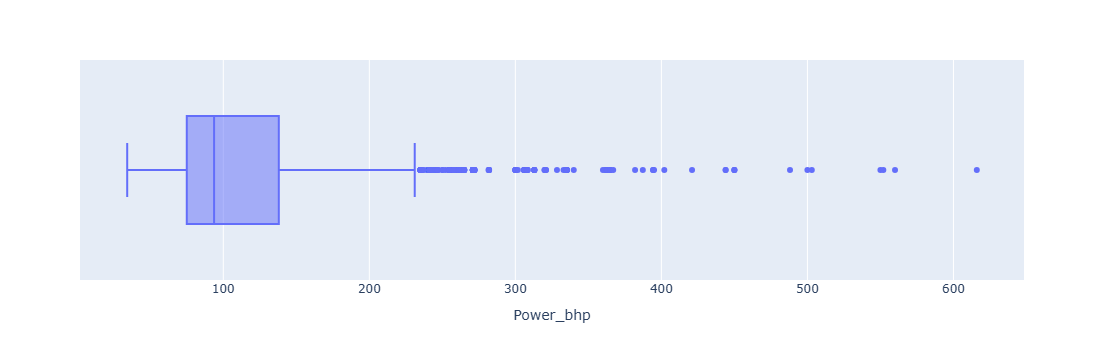

In [707]:
px.box(data_frame=df ,x="Power_bhp") #real

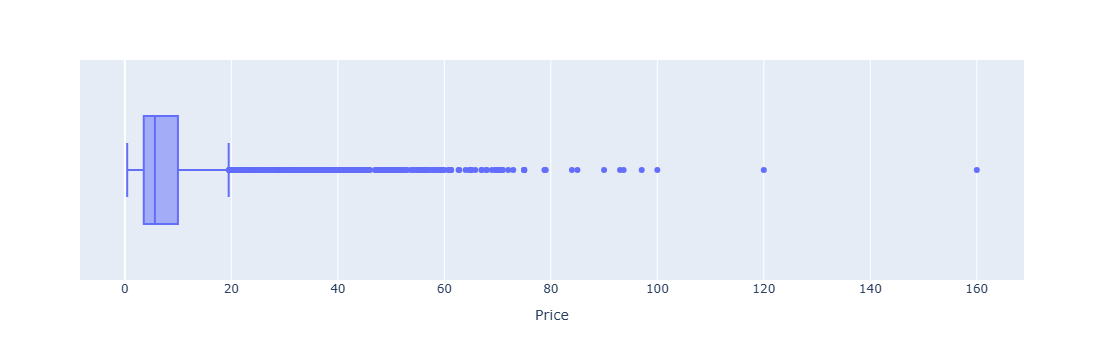

In [708]:
px.box(data_frame=df ,x="Price")

In [709]:
Q1 = df["Price"].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
df_outliers = df[(df["Price"] < min) | (df["Price"] > max)]
df_outliers # real

Name    Location  \
13                               Land Rover Range Rover 2.2L Pure       Delhi   
19               Mercedes-Benz New C-Class C 220 CDI BE Avantgare   Bangalore   
22                           Audi A6 2011-2015 35 TFSI Technology      Mumbai   
38                               Mercedes-Benz M-Class ML 350 CDI        Pune   
50                           Audi A4 2.0 TDI 177 Bhp Premium Plus       Kochi   
62                 Mercedes-Benz New C-Class C 200 CGI Avantgarde       Delhi   
67                       Mercedes-Benz C-Class Progressive C 220d  Coimbatore   
75                                 Audi A6 2.0 TDI Design Edition       Delhi   
92                               Audi A6 2011-2015 35 TDI Premium  Coimbatore   
107                          Jaguar XF 3.0 Litre S Premium Luxury   Hyderabad   
113                                 BMW 3 Series 320d Luxury Line      Mumbai   
116                                    Volvo V40 Cross Country D3   Bangalore   
134                                      Mercedes-Benz SLC 43 AMG     Kolkata   
148                                                Audi RS5 Coupe      Mumbai   
149                                      BMW 3 Series Luxury Line      Mumbai   
150                          Audi A4 2.0 TDI 177 Bhp Premium Plus  Coimbatore   
152                         Mercedes-Benz S Class 2005 2013 S 500     Kolkata   
168                                             BMW X5 xDrive 30d      Mumbai   
169                     Mercedes-Benz New C-Class C 220 CDI Style  Coimbatore   
172                                         Mercedes-Benz GLC 220   Bangalore   
176                                      Mini Countryman Cooper D      Jaipur   
178                        Audi A6 2011-2015 2.0 TDI Premium Plus      Mumbai   
182                                 BMW 5 Series 520d Luxury Line   Hyderabad   
186                     Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore   
191                           Land Rover Range Rover 2.2L Dynamic  Coimbatore   
205                 Audi Q3 2012-2015 35 TDI Quattro Premium Plus       Delhi   
216                                     Audi A8 L 3.0 TDI quattro       Delhi   
219                                 Skoda Superb Style 1.8 TSI AT   Hyderabad   
224         Mercedes-Benz New C-Class C 220d Avantgarde Edition C  Coimbatore   
228                                     Mini Cooper Convertible S       Kochi   
235                                Toyota Innova Crysta 2.8 GX AT       Kochi   
255                           Hyundai Tucson 2.0 e-VGT 2WD AT GLS       Kochi   
264                                        Mercedes-Benz GLE 350d  Coimbatore   
271                                      BMW X3 xDrive30d M Sport  Coimbatore   
282                            Audi Q7 3.0 TDI Quattro Technology       Kochi   
291                                   BMW 5 Series 2003-2012 520d        Pune   
298                                Toyota Innova Crysta 2.4 ZX MT     Chennai   
299                          Audi A6 2011-2015 2.0 TDI Technology       Kochi   
305                        Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi   
306                         Mercedes-Benz GLA Class 200 CDI SPORT       Delhi   
310                                        Mercedes-Benz GLE 250d   Hyderabad   
311                            Land Rover Range Rover HSE Dynamic       Delhi   
325                        Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi   
326                                  BMW 6 Series 640d Gran Coupe      Mumbai   
327                             Audi Q7 45 TDI Quattro Technology  Coimbatore   
348                                      BMW 3 Series Luxury Line       Kochi   
355                                Jaguar XF 2.0 Diesel Portfolio   Hyderabad   
357                                   Skoda Superb L&K 1.8 TSI AT       Kochi   
365                                         Mini Clubman Cooper S        Pune   
374        

In [710]:
df[df['Price']==160]

Name   Location    Year  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue  Hyderabad  2017.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_kmpl  \
4079            25000.0    Diesel    Automatic      First         13.33   

      Engine_CC  Power_bhp  Seats  Price Type of Car Car Model  
4079     2993.0      255.0    5.0  160.0        Land     Rover

In [711]:
df[df['Price']==120]

Name Location    Year  Kilometers_Driven  \
5781  Lamborghini Gallardo Coupe    Delhi  2011.0             6500.0   

     Fuel_Type Transmission Owner_Type  Mileage_kmpl  Engine_CC  Power_bhp  \
5781    Petrol    Automatic      Third           6.4     5204.0      560.0   

      Seats  Price  Type of Car Car Model  
5781    2.0  120.0  Lamborghini  Gallardo

In [712]:
def lakhs_to_inr(lakhs):
    return lakhs * 100000
    
df["Price"]=df["Price"].apply(lakhs_to_inr)   


In [713]:
df.columns=df.columns.str.replace("Price","Price_INR")

In [714]:
df.isna().mean()*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.055150
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage_kmpl         1.392527
Engine_CC            0.000000
Power_bhp            0.000000
Seats                0.000000
Price_INR            0.000000
Type of Car          0.000000
Car Model            0.000000
dtype: float64

In [715]:
df["Kilometers_Driven"] = df["Kilometers_Driven"].fillna(df["Kilometers_Driven"].median())

In [716]:
numeric_cols = df.select_dtypes(include=['number']).columns
knn_imp = KNNImputer(n_neighbors=3)
df[numeric_cols] = knn_imp.fit_transform(df[numeric_cols])

In [717]:
df.isna().mean()*100

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage_kmpl         0.0
Engine_CC            0.0
Power_bhp            0.0
Seats                0.0
Price_INR            0.0
Type of Car          0.0
Car Model            0.0
dtype: float64

In [718]:
#df["Name"].unique().tolist()

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   float64
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_kmpl       7253 non-null   float64
 8   Engine_CC          7253 non-null   float64
 9   Power_bhp          7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price_INR          7253 non-null   float64
 12  Type of Car        7253 non-null   object 
 13  Car Model          7253 non-null   object 
dtypes: float64(7), object(7)
memory usage: 793.4+ KB


In [720]:
df[df["Owner_Type"]=='Fourth & Above']

Name    Location    Year  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007.0   
885                   Maruti Grand Vitara AT     Chennai  2008.0   
1081           Hyundai i20 1.2 Sportz Option   Bangalore  2010.0   
1699  Ford Endeavour 4x2 XLT Limited Edition        Pune  2007.0   
2988    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai  2005.0   
3368                  Maruti Swift Ldi BSIII        Pune  2009.0   
3404                    Maruti Swift 1.3 VXi      Jaipur  2006.0   
4148                     Ford Ikon 1.3 Flair  Coimbatore  2008.0   
5647                  Toyota Qualis Fleet A3      Mumbai  2001.0   
6226                 Maruti Omni E 8 Str STD   Bangalore  2005.0   
6454       Hyundai Santro LS zipDrive Euro I     Chennai  2002.0   
6467                            Tata Nano XT   Bangalore  2016.0   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage_kmpl  \
29             262000.0    Diesel       Manual  Fourth & Above         12.80   
885             77000.0    Petrol    Automatic  Fourth & Above          9.70   
1081            61000.0    Petrol       Manual  Fourth & Above         17.00   
1699            90000.0    Diesel       Manual  Fourth & Above         10.90   
2988           240000.0    Diesel       Manual  Fourth & Above         12.80   
3368            80000.0    Diesel       Manual  Fourth & Above         17.80   
3404           125000.0    Petrol       Manual  Fourth & Above         16.10   
4148            59833.0    Petrol       Manual  Fourth & Above         13.80   
5647           227000.0    Diesel       Manual  Fourth & Above         19.13   
6226            81245.0    Petrol       Manual  Fourth & Above         16.80   
6454           120000.0    Petrol       Manual  Fourth & Above         17.40   
6467            14000.0    Petrol       Manual  Fourth & Above         23.90   

        Engine_CC   Power_bhp  Seats      Price_INR Type of Car  Car Model  
29    2494.000000  102.000000    7.0  400000.000000      Toyota     Innova  
885   1995.000000  163.500000    5.0  550000.000000      Maruti      Grand  
1081  1197.000000   80.000000    5.0  325000.000000     Hyundai        i20  
1699  2499.000000  143.000000    7.0  300000.000000        Ford  Endeavour  
2988  2494.000000  102.000000    8.0  510000.000000      Toyota     Innova  
3368  1248.000000   75.000000    5.0  215000.000000      Maruti      Swift  
3404  1728.333333   88.666667    5.0  235000.000000      Maruti      Swift  
4148  1299.000000   70.000000    5.0  197000.000000        Ford       Ikon  
5647  2446.000000  132.633333    8.0  220000.000000      Toyota     Qualis  
6226   796.000000   34.200000    8.0  208333.333333      Maruti       Omni  
6454   999.000000   73.300000    5.0  178000.000000     Hyundai     Santro  
6467   624.000000   37.480000    4.0  388333.333333        Tata       Nano

In [721]:
df["Engine_CC"]=df["Engine_CC"].astype("int")

In [722]:
df["Year"]=df["Year"].astype("int")

In [723]:
df["Seats"]=df["Seats"].astype("int")

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int32  
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_kmpl       7253 non-null   float64
 8   Engine_CC          7253 non-null   int32  
 9   Power_bhp          7253 non-null   float64
 10  Seats              7253 non-null   int32  
 11  Price_INR          7253 non-null   float64
 12  Type of Car        7253 non-null   object 
 13  Car Model          7253 non-null   object 
dtypes: float64(4), int32(3), object(7)
memory usage: 708.4+ KB


In [725]:
df[df["Fuel_Type"]=="Electric"]

Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016            50000.0  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011            44000.0  Electric   

     Transmission Owner_Type  Mileage_kmpl  Engine_CC  Power_bhp  Seats  \
4446    Automatic      First     20.913333         72       41.0      5   
4904    Automatic      First     16.976667       1798       73.0      5   

      Price_INR Type of Car Car Model  
4446  1300000.0    Mahindra         E  
4904  1275000.0      Toyota     Prius

In [726]:
df.drop([4446, 4904], axis=0, inplace=True)     # it is 2 electric car not necessary
df.reset_index(drop=True, inplace=True)

In [727]:
def classify_car_price(price_inr):
    if price_inr < 500000:
        return "Economy"
    elif 500000 <= price_inr < 1000000:
        return "Mid-range"
    elif 1000000 <= price_inr < 2000000:
        return "Luxury"
    else:
        return "Ultra-Luxury"

In [728]:
df["price rate"] = df["Price_INR"].apply(classify_car_price)

In [729]:
df["Car_Age"] = 2019 - df["Year"]

In [730]:
df["Avg_KM_Per_Year"] = df["Kilometers_Driven"] / df["Car_Age"]

In [731]:
df.to_csv(r"C:\Users\NOUR SOFT\Downloads\used_cars_data400.csv",index=False)